In [ ]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA


dataFile = pd.read_csv('pca_test_dhenge2kumar1.csv')
print(dataFile)

In [ ]:
dataFile_edit = dataFile.drop(['Sr No','Screw Configuration'],axis=1)
y = dataFile_edit.loc[:,['Experiments']].values
dataFile_edit = dataFile_edit.drop(['Experiments'],axis=1)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(dataFile_edit[['Liq add position']]).toarray())
dataFile_edit = dataFile_edit.join(enc_df)
dataFile_edit = dataFile_edit.drop(['Liq add position'],axis=1)
print(dataFile_edit)

In [7]:
pca = PCA(n_components=3)
from sklearn.preprocessing import normalize,minmax_scale,maxabs_scale,scale
prinComp = pca.fit_transform(scale(dataFile_edit))
# prinComp1 = pca.fit(dataFile_edit)
prinDF = pd.DataFrame(data=prinComp, columns=['PC 1', 'PC 2','PC 3'])
finDF = pd.concat([prinDF,dataFile['Experiments']],axis=1)
print(prinDF)

        PC 1      PC 2      PC 3
0  -1.166023 -0.463718 -0.088754
1  -1.408260 -0.560782  0.054732
2  -1.650497 -0.657847  0.198219
3  -1.403359 -0.553172  0.000764
4  -1.645596 -0.650236  0.144250
..       ...       ...       ...
67  4.149563  2.860632 -0.917778
68  4.102096  2.842742 -0.899874
69  4.771013  3.140011  2.205547
70  4.723546  3.122120  2.223450
71  4.676079  3.104230  2.241354

[72 rows x 3 columns]


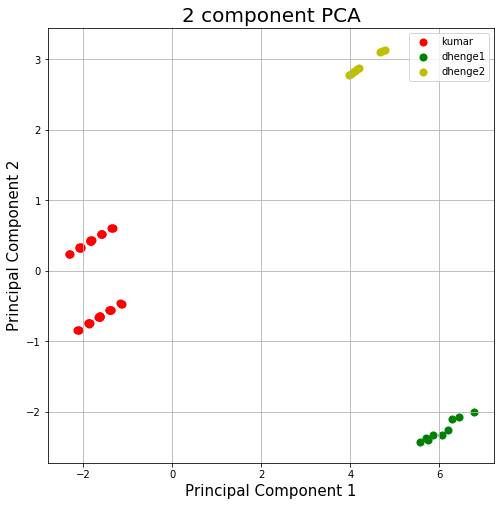

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['kumar','dhenge1','dhenge2']
colors = ['r','g','y']
for target,color in zip(targets,colors):
    indices = finDF['Experiments'] == target
    ax.scatter(finDF.loc[indices,'PC 1'],finDF.loc[indices,'PC 2'],c=color,s=50)
ax.legend(targets)
ax.grid()

In [9]:
print(pca.explained_variance_ratio_)

[0.71132113 0.14992455 0.05570424]


In [12]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index=dataFile_edit.keys())
print(loading_matrix)

                                   PC1           PC2       PC3
RPM (1/s)                -7.122264e-01 -1.310209e-01  0.118059
L/S Ratio                 9.737122e-01  9.823992e-02 -0.050589
FlowRate (kg/hr)         -7.816441e-01 -1.352531e-01  0.082502
Temperature              -2.656084e-18  1.560829e-16 -0.000000
nCE                       7.005109e-01 -7.201611e-01  0.001058
Granulator diameter (mm) -9.910875e-01 -1.397828e-01  0.043809
L/D Ratio                 9.910875e-01  1.397828e-01 -0.043809
SA of KE                 -7.598059e-01  6.151966e-01  0.007706
n KE                     -2.274784e-01  9.507888e-01 -0.032624
Intial D50                9.910875e-01  1.397828e-01 -0.043809
Binder Viscosity (mPa.s)  5.456867e-01  1.141300e-01  0.835709
Flowability (HR)         -9.910875e-01 -1.397828e-01  0.043809
0                         9.910875e-01  1.397828e-01 -0.043809
1                        -9.910875e-01 -1.397828e-01  0.043809
